# Problem Statement

Prediction of Diabetes based on following attributes
target     >> Outcome
attributes >> Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age

# 1. Logistic Regression

## Import Required Libraries 

In [19]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

import seaborn as sns
import matplotlib.pyplot as plt

## Data Gathering

In [4]:
df_diab = pd.read_csv("diabetes.csv")
df_diab.head()

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             50             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3      150             66             23       94  28.1   
4      150             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   52        1  
3                     0.167   21        0  
4                     2.288   33        1

## Feature Engineering

In [6]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [7]:
df_diab.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df_diab.nunique()

Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [24]:
df_diab.describe()

Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
count  768.000000     768.000000     768.000000  768.000000  768.000000   
mean   121.117188      69.076823      20.536458   79.799479   31.992578   
std     31.805091      19.367794      15.952218  115.244002    7.884160   
min      0.000000       0.000000       0.000000    0.000000    0.000000   
25%     99.000000      62.000000       0.000000    0.000000   27.300000   
50%    117.000000      72.000000      23.000000   30.500000   32.000000   
75%    142.000000      80.000000      32.000000  127.250000   36.600000   
max    199.000000     122.000000      99.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.243490    0.348958  
std                    0.331329   11.758182    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.243750   24.000000    0.000000  
50%                    0.372500   29.000000    0.000000  
75%                    0.626250   41.000000    1.000000  
max                    2.420000   81.000000    1.000000

<AxesSubplot:>

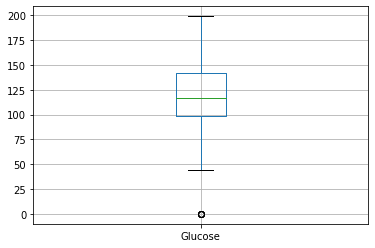

In [27]:
df_diab[["Glucose"]].boxplot()

<AxesSubplot:>

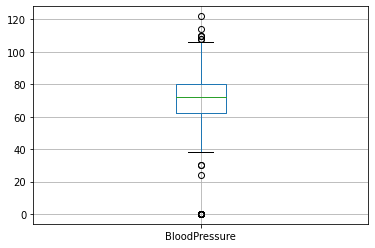

In [28]:
df_diab[["BloodPressure"]].boxplot()

<AxesSubplot:>

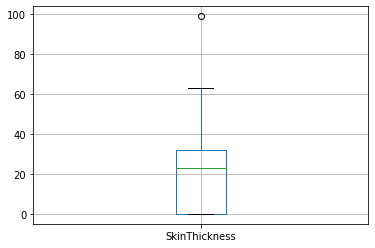

In [29]:
df_diab[["SkinThickness"]].boxplot()

<AxesSubplot:>

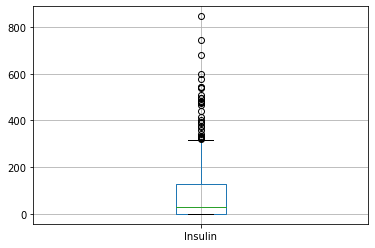

In [30]:
df_diab[["Insulin"]].boxplot()

<AxesSubplot:>

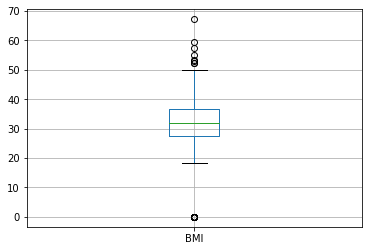

In [31]:
df_diab[["BMI"]].boxplot()

<AxesSubplot:>

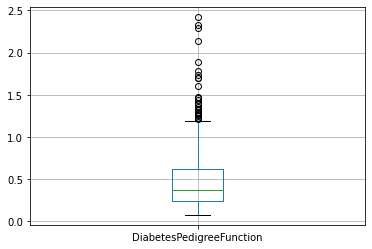

In [32]:
df_diab[["DiabetesPedigreeFunction"]].boxplot()

<AxesSubplot:>

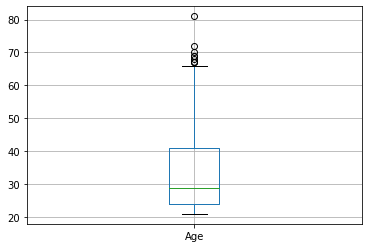

In [33]:
df_diab[["Age"]].boxplot()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

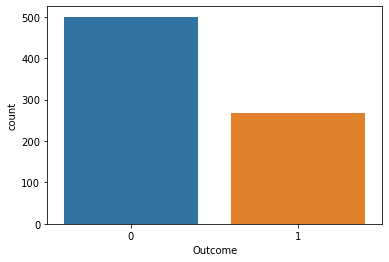

In [38]:
sns.countplot(x = df_diab["Outcome"])

In [42]:
df_diab["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [43]:
500/768*100          

65.10416666666666

In [44]:
268/768*100

34.89583333333333

## feature selection

we will take all features 

## Train_test_split

In [9]:
x = df_diab.drop("Outcome", axis=1)
y = df_diab["Outcome"]

In [47]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [69]:
#To handle Imbalanced Data >> 80 -20 
# SMOTE

from imblearn.over_sampling import SMOTE

smt = SMOTE()    # 90% oversamling
x_sample, y_sample = smt.fit_resample(x,y)
y_sample.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [70]:
# from imblearn.under_sampling import RandomUnderSampler

# under_sampling = RandomUnderSampler()
# x_sampled , y_sampled = under_sampling.fit_resample(x,y)
# y_sampled.value_counts()

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size= 0.25, random_state=10)

## Model Training

In [72]:
Logi_model = LogisticRegression()
Logi_model.fit(x_train, y_train)

C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluation

In [73]:
# Training Data Evaluation 
y_pred = Logi_model.predict(x_train)

acc = accuracy_score(y_train, y_pred)
print("Training accuracy score :", acc)

cnf_matrix = confusion_matrix(y_train, y_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

clas_report = classification_report(y_train, y_pred)
print("\nClassification Report :/n",clas_report)

# Testing Data Evaluation 
y_pred = Logi_model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print(" Testing accuracy score :", acc)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix :\n",cnf_matrix)

clas_report = classification_report(y_test, y_pred)
print("\nClassification Report :/n",clas_report)

Training accuracy score : 0.7587064676616916

Confusion Matrix :
 [[162  41]
 [ 56 143]]

Classification Report :/n               precision    recall  f1-score   support

           0       0.74      0.80      0.77       203
           1       0.78      0.72      0.75       199

    accuracy                           0.76       402
   macro avg       0.76      0.76      0.76       402
weighted avg       0.76      0.76      0.76       402

 Testing accuracy score : 0.746268656716418

Confusion Matrix :
 [[52 13]
 [21 48]]

Classification Report :/n               precision    recall  f1-score   support

           0       0.71      0.80      0.75        65
           1       0.79      0.70      0.74        69

    accuracy                           0.75       134
   macro avg       0.75      0.75      0.75       134
weighted avg       0.75      0.75      0.75       134



## Result by Logistic Regression

Training accuracy score : 0.758
Testing accuracy score : 0.746

# 2. KNN_ classifier

## import libraries

In [75]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

## Data Gathering

In [77]:
df_diab = pd.read_csv("diabetes.csv")
df_diab.head()

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             50             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3      150             66             23       94  28.1   
4      150             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   52        1  
3                     0.167   21        0  
4                     2.288   33        1

In [78]:
df_diab.describe()

Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
count  768.000000     768.000000     768.000000  768.000000  768.000000   
mean   121.117188      69.076823      20.536458   79.799479   31.992578   
std     31.805091      19.367794      15.952218  115.244002    7.884160   
min      0.000000       0.000000       0.000000    0.000000    0.000000   
25%     99.000000      62.000000       0.000000    0.000000   27.300000   
50%    117.000000      72.000000      23.000000   30.500000   32.000000   
75%    142.000000      80.000000      32.000000  127.250000   36.600000   
max    199.000000     122.000000      99.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.243490    0.348958  
std                    0.331329   11.758182    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.243750   24.000000    0.000000  
50%                    0.372500   29.000000    0.000000  
75%                    0.626250   41.000000    1.000000  
max                    2.420000   81.000000    1.000000

In [80]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


## Model Training without Scaling

In [82]:
x = df_diab.drop("Outcome", axis = 1)
y = df_diab["Outcome"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23, stratify=y)

In [83]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x,y)

KNeighborsClassifier()

## Evaluation

In [84]:
# Traning

y_pred_train = knn_clf.predict(x_train)

acc_score = accuracy_score(y_train, y_pred_train)
print("Traning Accuracy :", acc_score)

# Testing
y_pred_test = knn_clf.predict(x_test)

acc_score_test = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy :", acc_score_test)

Traning Accuracy : 0.7910447761194029
Testing Accuracy : 0.7761194029850746


## Model Training with Scaling 

In [85]:
x.head()

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             50             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3      150             66             23       94  28.1   
4      150             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   52  
3                     0.167   21  
4                     2.288   33

## Normalization

In [86]:
normal_scaler = MinMaxScaler()
normal_scaler.fit(x)

normalized_array = normal_scaler.transform(x)

x_norm = pd.DataFrame(normalized_array,columns= x.columns)
x_norm.head()

Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0  0.743719       0.409836       0.353535  0.000000  0.500745   
1  0.427136       0.540984       0.292929  0.000000  0.396423   
2  0.919598       0.524590       0.000000  0.000000  0.347243   
3  0.753769       0.540984       0.232323  0.111111  0.418778   
4  0.753769       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.516667  
3                  0.038002  0.000000  
4                  0.943638  0.200000

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.25, random_state=23, stratify=y)

KNN_norm = KNeighborsClassifier()
KNN_norm.fit(x_train,y_train)

KNeighborsClassifier()

In [88]:
# training evaluation
y_pred_train = KNN_norm.predict(x_train)

acc = accuracy_score(y_train, y_pred_train)
print("Training accuracy :", acc)


# Testing
y_pred_test = KNN_norm.predict(x_test)

acc_score_test = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy :", acc_score_test)

Training accuracy : 0.8315972222222222
Testing Accuracy : 0.7135416666666666


## Standardization

In [89]:
std_scale = StandardScaler()
std_scale.fit(x)

standardized_array = std_scale.transform(x)
x_std = pd.DataFrame(standardized_array, columns=x.columns)
x_std.head()

Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0  0.845787      -0.985618       0.907270 -0.692891  0.204013   
1 -1.136319      -0.158966       0.530902 -0.692891 -0.684422   
2  1.946957      -0.262298      -1.288212 -0.692891 -1.103255   
3  0.908711      -0.158966       0.154533  0.123302 -0.494043   
4  0.908711      -1.502276       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.426022  
1                 -0.365061 -0.190927  
2                  0.604397  1.596227  
3                 -0.920763 -1.041953  
4                  5.484909 -0.020722

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25, random_state=23, stratify=y)

KNN_std = KNeighborsClassifier()
KNN_std.fit(x_train,y_train)

KNeighborsClassifier()

In [92]:
# Training

y_pred_train = KNN_std.predict(x_train)

acc_score = accuracy_score(y_train, y_pred_train)
print("Training Accuracy :", acc_score)

# Testing
y_pred_test = KNN_std.predict(x_test)

acc_score_test = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy :", acc_score_test)

Training Accuracy : 0.8194444444444444
Testing Accuracy : 0.71875


## Result by  KNN classifier with scaling (normalization)

Training Accuracy : 0.8194444444444444
Testing Accuracy : 0.71875

# 3. Decision Tree 

# import libraries

In [110]:
import pandas as pd
import numpy as np
 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv("diabetes.csv")
df.head()

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             50             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3      150             66             23       94  28.1   
4      150             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   52        1  
3                     0.167   21        0  
4                     2.288   33        1

In [105]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Train Test Split

In [106]:
x = df.drop("Outcome", axis=1)
y = df["Outcome"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11, stratify=y)

## Model Training

In [107]:
DT_clf = DecisionTreeClassifier()
DT_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [108]:
# Training

y_pred_train = DT_clf.predict(x_train)

acc_score_train = accuracy_score(y_train,y_pred_train)
print("Accuracy Score Training : ", acc_score_train)

# Testing

y_pred_test = DT_clf.predict(x_test)

acc_score_test = accuracy_score(y_test,y_pred_test)
print("Accuracy Score Testing : ", acc_score_test)

Accuracy Score Training :  1.0
Accuracy Score Testing :  0.7532467532467533


## Plot Decision Tree

In [111]:
plt.figure(figsize=(200,160))
plot_tree(DT_clf, feature_names = x.columns, class_names = ["0","1"], filled = True)
plt.savefig("Diabetes_DT.png")

## HyperParameter Tunning

In [ ]:
DecisionTreeClassifier(
    *,
    criterion='gini',
    
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    ccp_alpha=0.0,
)

In [112]:
dt_clf = DecisionTreeClassifier()

In [113]:
hyp_para = {"criterion":["gini","entrpy"], "max_depth":np.arange(3,10),"min_samples_split":np.arange(2,20),
       "min_samples_leaf":np.arange(2,10)}

In [114]:
gscv_dt = GridSearchCV(dt_clf,hyp_para, cv= 5)
gscv_dt.fit(x_train,y_train)
gscv_dt.best_estimator_

C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5040 fits failed out of a total of 10080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5040 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\Lakhan\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_p

DecisionTreeClassifier(max_depth=4, min_samples_leaf=9)

In [115]:
dt_clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=9)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=9)

In [116]:
# Training

y_pred_train = dt_clf.predict(x_train)

acc_score_train = accuracy_score(y_train,y_pred_train)
print("Accuracy Score Training after HyperParameter Tuning: ", acc_score_train)

# Testing

y_pred_test = dt_clf.predict(x_test)

acc_score_test = accuracy_score(y_test,y_pred_test)
print("Accuracy Score Testing after HyperParameter Tuning: ", acc_score_test)

Accuracy Score Training after HyperParameter Tuning:  0.7850162866449512
Accuracy Score Testing after HyperParameter Tuning:  0.7467532467532467


##  Plot Decision Tree after Hyperparamter Tuning

In [117]:
plt.figure(figsize=(200,160))
plot_tree(dt_clf, feature_names = x.columns, class_names = ["0","1"], filled = True)
plt.savefig("DT_diabtes_hyp.png")

## Result by  Decision Tree classifier after HyperParameter Tuning

Accuracy Score Training after HyperParameter Tuning:  0.7850162866449512
Accuracy Score Testing after HyperParameter Tuning:  0.7467532467532467

# 4. Random Forest

## import libraries

In [119]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Data Gathering

In [121]:
df = pd.read_csv("diabetes.csv")
df.head()

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             50             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3      150             66             23       94  28.1   
4      150             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   52        1  
3                     0.167   21        0  
4                     2.288   33        1

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


## Train Test Split

In [123]:
x = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=30)

In [125]:
RF_clf = RandomForestClassifier(random_state=10)
RF_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

## Evaluation

In [127]:
# Training Evaluation

y_pred = RF_clf.predict(x_train)

acc_score = accuracy_score(y_train,y_pred)
print("Accuracy Score Traning :", acc_score)

cnf_matrix = confusion_matrix(y_train,y_pred)
print("Confusion Matrix Traning : \n", cnf_matrix)

class_report = classification_report(y_train,y_pred)
print("Classification Report :\n", class_report)

# Testing Evaluation

y_pred = RF_clf.predict(x_test)

acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score Testing :", acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix Testing : \n", cnf_matrix)

class_report = classification_report(y_test,y_pred)
print("Classification Report :\n", class_report)

Accuracy Score Traning : 1.0
Confusion Matrix Traning : 
 [[400   0]
 [  0 214]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Accuracy Score Testing : 0.8116883116883117
Confusion Matrix Testing : 
 [[84 16]
 [13 41]]
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       100
           1       0.72      0.76      0.74        54

    accuracy                           0.81       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.81      0.81      0.81       154



## HyperParameter Tuning

In [128]:
rf_clf = RandomForestClassifier(random_state=10)

hyp = {"n_estimators" : np.arange(10,200),
    "criterion" : ['gini', "entropy"],
    "max_depth" :  np.arange(5,15),
    "min_samples_split": np.arange(5,20),
    "min_samples_leaf" : np.arange(4,15),
    "max_features" : ['sqrt']}

In [129]:
rscv_rf_clf = RandomizedSearchCV(rf_clf, hyp, cv=6)
rscv_rf_clf.fit(x_train,y_train)
rscv_rf_clf.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=6, min_samples_split=18,
                       n_estimators=25, random_state=10)

In [130]:
rf_model = RandomForestClassifier(max_depth=8, min_samples_leaf=6, min_samples_split=18,
                       n_estimators=25, random_state=10)
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=6, min_samples_split=18,
                       n_estimators=25, random_state=10)

In [131]:
# Training Evaluation

y_pred = rf_model.predict(x_train)

acc_score = accuracy_score(y_train,y_pred)
print("Accuracy Score Traning :", acc_score)

cnf_matrix = confusion_matrix(y_train,y_pred)
print("Confusion Matrix Traning : \n", cnf_matrix)

class_report = classification_report(y_train,y_pred)
print("Classification Report :\n", class_report)

# Testing Evaluation

y_pred = rf_model.predict(x_test)

acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score Testing :", acc_score)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix Testing : \n", cnf_matrix)

class_report = classification_report(y_test,y_pred)
print("Classification Report :\n", class_report)

Accuracy Score Traning : 0.8583061889250815
Confusion Matrix Traning : 
 [[366  34]
 [ 53 161]]
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       400
           1       0.83      0.75      0.79       214

    accuracy                           0.86       614
   macro avg       0.85      0.83      0.84       614
weighted avg       0.86      0.86      0.86       614

Accuracy Score Testing : 0.8051948051948052
Confusion Matrix Testing : 
 [[88 12]
 [18 36]]
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       100
           1       0.75      0.67      0.71        54

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



## Result by  Random Forest classifier after HyperParameter Tuning

Accuracy Score Traning : 0.8583061889250815
Accuracy Score Testing : 0.8051948051948052